In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS =30

In [3]:
train_ds = preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\train_aug",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28287 files belonging to 7 classes.


In [4]:
val_ds=preprocessing.image_dataset_from_directory(
     r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 736 files belonging to 7 classes.


In [5]:
test_ds = preprocessing.image_dataset_from_directory(
    r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 726 files belonging to 7 classes.


In [6]:
class_names = train_ds.class_names
class_names

['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

In [7]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,139,271
Trainable params: 6,424,583
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Configure early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # To display messages when the callback takes action
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [11]:
# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1,
    #callbacks=[early_stopping]
)

Epoch 1/30
884/884 [==============================] - 73s 78ms/step - loss: 1.7695 - accuracy: 0.5713 - val_loss: 0.4653 - val_accuracy: 0.8668
Epoch 2/30
884/884 [==============================] - 67s 76ms/step - loss: 0.8254 - accuracy: 0.7124 - val_loss: 0.2785 - val_accuracy: 0.9293
Epoch 3/30
884/884 [==============================] - 67s 76ms/step - loss: 0.6864 - accuracy: 0.7644 - val_loss: 0.1723 - val_accuracy: 0.9375
Epoch 4/30
884/884 [==============================] - 67s 76ms/step - loss: 0.6155 - accuracy: 0.7834 - val_loss: 0.1929 - val_accuracy: 0.9429
Epoch 5/30
884/884 [==============================] - 67s 76ms/step - loss: 0.5693 - accuracy: 0.8099 - val_loss: 0.1665 - val_accuracy: 0.9416
Epoch 6/30
884/884 [==============================] - 67s 76ms/step - loss: 0.5244 - accuracy: 0.8249 - val_loss: 0.1877 - val_accuracy: 0.9402
Epoch 7/30
884/884 [==============================] - 67s 76ms/step - loss: 0.4827 - accuracy: 0.8376 - val_loss: 0.1822 - val_accuracy:

In [12]:
# Define the desired file path for saving the model
model_path = r'C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\VGG16_Rice_Pest_aug.h5'

# Save the trained model to the specified path
model.save(model_path)

In [13]:
model.save_weights(r"C:\Users\Hp\Desktop\New folder\Amit\Notebooks\DL results\VGG_16_Model_Rice_Pest_aug_weights.h5")

In [14]:
# Save model architecture to JSON
model_json = model.to_json()
with open("VGG_16model_Rice_Pest_aug_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [15]:
# Evaluate on validation dataset
scores_val = model.evaluate(val_ds)
print(f"Validation loss: {scores_val[0]}, Validation accuracy: {scores_val[1]}")

# Evaluate on test dataset
scores_test = model.evaluate(test_ds)
print(f"Test loss: {scores_test[0]}, Test accuracy: {scores_test[1]}")

# Evaluate on training dataset
scores_train = model.evaluate(train_ds)
print(f"Training loss: {scores_train[0]}, Training accuracy: {scores_train[1]}")

23/23 [==============================] - 2s 74ms/step - loss: 0.2483 - accuracy: 0.9497
Validation loss: 0.24827992916107178, Validation accuracy: 0.94972825050354
23/23 [==============================] - 4s 168ms/step - loss: 0.3679 - accuracy: 0.9601
Test loss: 0.3679490089416504, Test accuracy: 0.9600551128387451
884/884 [==============================] - 65s 74ms/step - loss: 0.0452 - accuracy: 0.9855
Training loss: 0.04524403437972069, Training accuracy: 0.9855057001113892


In [16]:
# Define the data
data = {
    'Metric': ['Validation Loss', 'Validation Accuracy', 'Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'],
    'Score': [scores_val[0], scores_val[1], scores_test[0], scores_test[1],scores_train[0], scores_train[1]]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('evaluation_results_VGG16_Wheat_Pest_aug.csv', index=False)

print("Evaluation results saved to 'evaluation_results.csv'.")

Evaluation results saved to 'evaluation_results.csv'.


In [17]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print (predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
    print(predicted_class, confidence)

first image to predict
actual label: Demsel Fly
1/1 [==============================] - 0s 217ms/step
predicted label: Demsel Fly


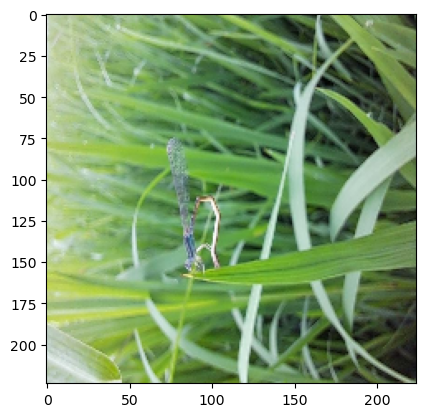

In [18]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

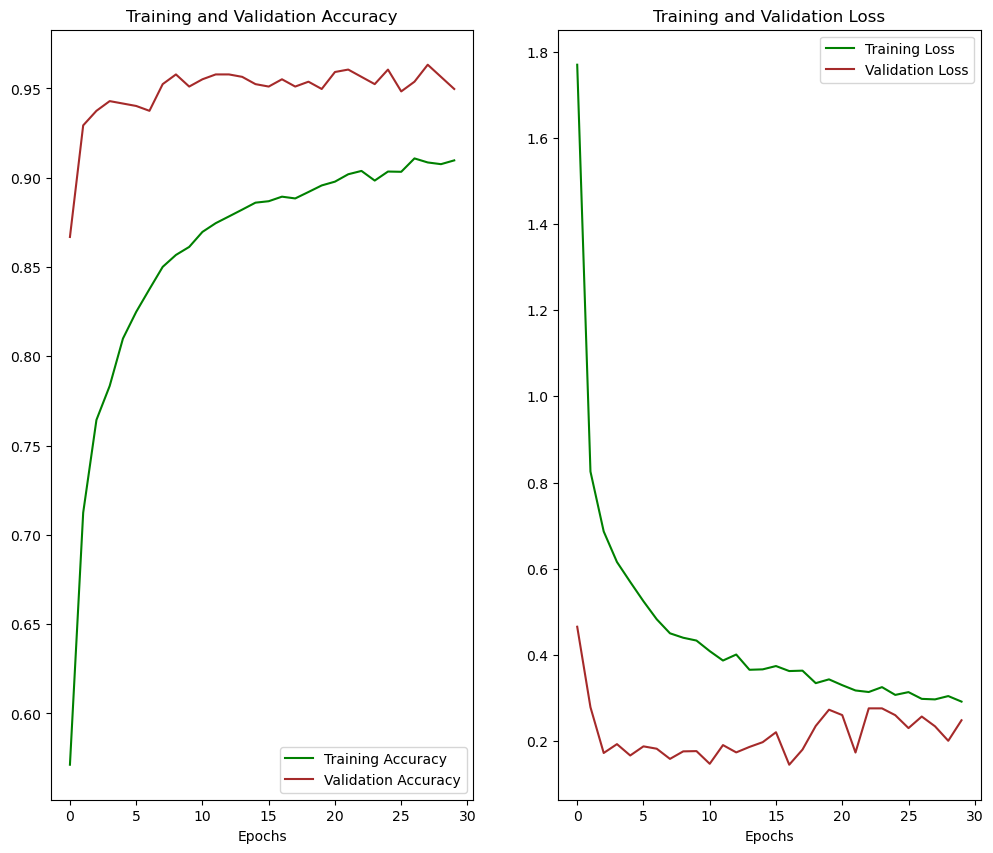

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='green')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='brown')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Adding x-axis label

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='brown')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Adding x-axis label
plt.savefig("VGG16_Rice_Pest_aug Accuracy and Loss", dpi=2000)
plt.show()

1/1 [==============================] - 0s 118ms/step


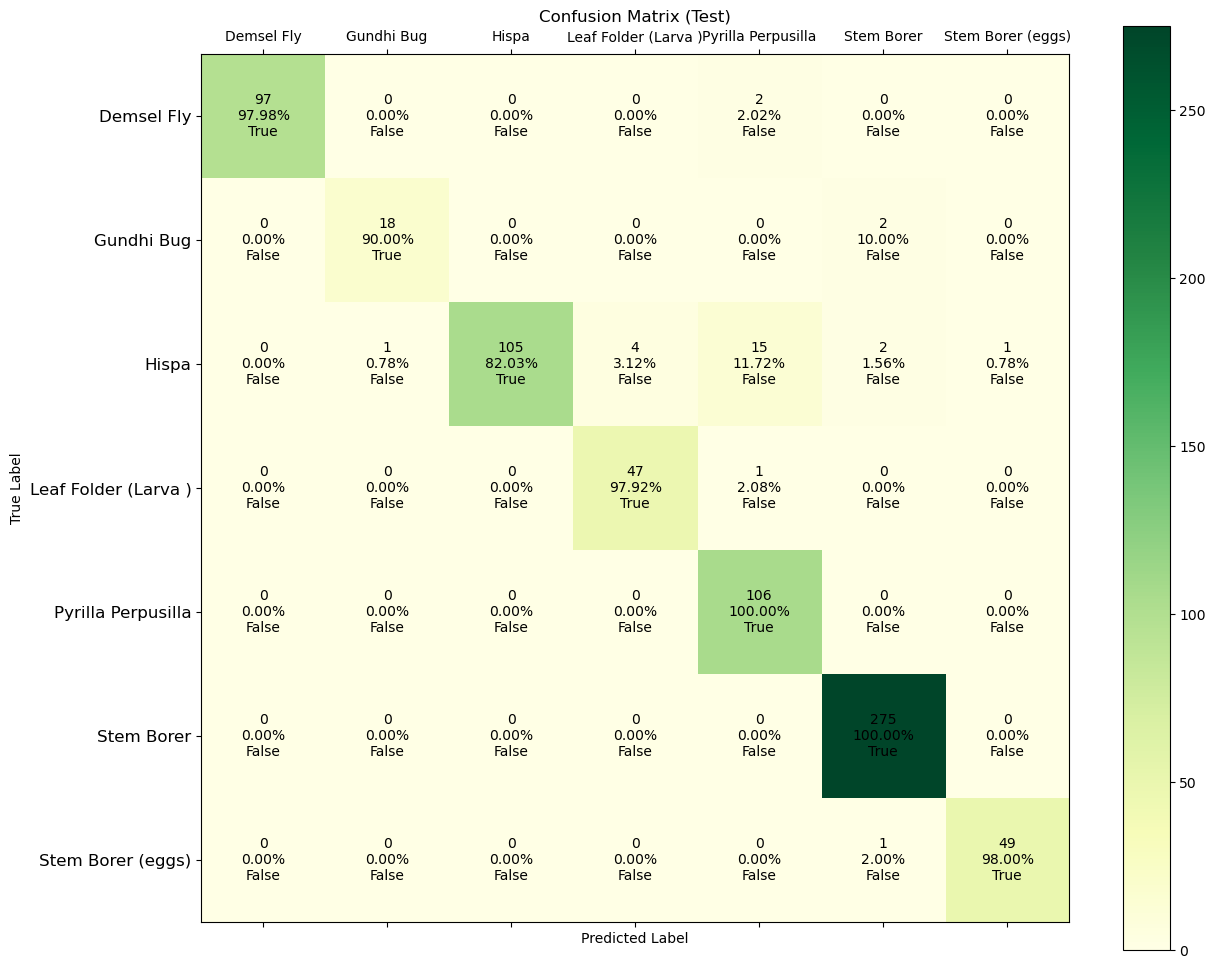

In [20]:
import pandas as pd
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in test_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(14, 12))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.set_xticklabels(class_names, fontsize=10)  # Set font size for x-axis labels
ax.set_yticklabels(class_names, fontsize=12)  # Set font size for y-axis labels
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("VGG16_Rice_Pest_aug Confusion Matrix Test", dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('test_results_VGG16_Rice_Pest_aug.csv', index=False)


In [21]:
from sklearn.metrics import precision_recall_fscore_support

1/1 [==============================] - 0s 22ms/step


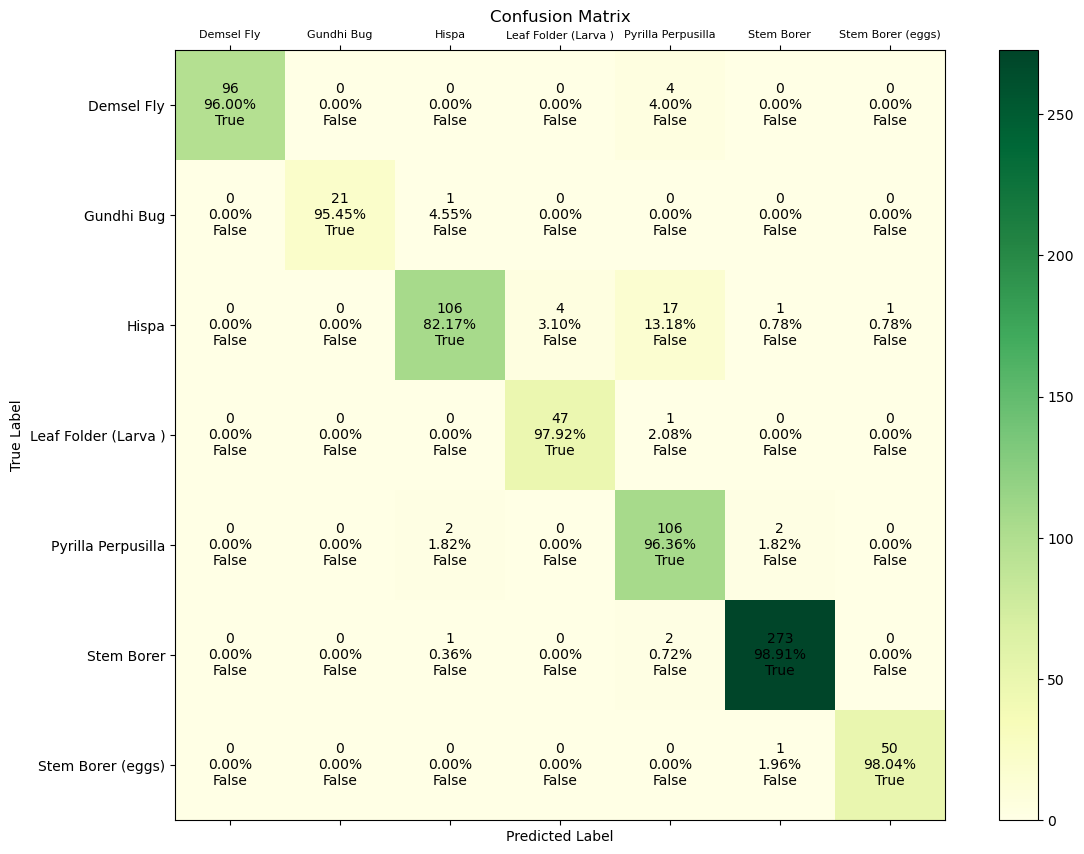

In [24]:
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in val_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(14, 10))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.set_xticklabels(class_names, fontsize=8)  # Set font size for x-axis labels
ax.set_yticklabels(class_names, fontsize=10)  # Set font size for y-axis labels
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("VGG16_Rice_Pest_aug Confusion Matrix Validation", dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('valid_results_VGG16_Rice_Pest_aug.csv', index=False)

In [25]:
# Let's assume you have a pre-trained model named 'model'
# Get one batch of images and labels from the test dataset
for test_images, test_labels in test_ds.take(1):
    break

# Make predictions
logits = model(test_images)
test_predictions = tf.argmax(logits, axis=1)

# Convert to numpy for easier handling in plotting
test_images = test_images.numpy()
test_labels = test_labels.numpy()
test_predictions = test_predictions.numpy()

In [26]:
test_images = []
test_labels = []
predictions = []

# Assuming 'test_ds' is your testing dataset
for images, labels in test_ds.take(-1):  # Take all batches in the dataset
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to numpy arrays for easier handling
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = np.array(predictions)

1/1 [==============================] - 0s 21ms/step


In [27]:
# Compute precision, recall, f1 score, and other metrics
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_predictions, average=None, labels=np.arange(len(class_names)))
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='micro')
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='macro')
weighted_precision, weighted_recall, weighted_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Add micro, macro, and weighted averages to the DataFrame
metrics_df = metrics_df.append({
    'Class': 'Micro Average',
    'Precision': micro_precision,
    'Recall': micro_recall,
    'F1 Score': micro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Macro Average',
    'Precision': macro_precision,
    'Recall': macro_recall,
    'F1 Score': macro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Weighted Average',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1 Score': weighted_f1_score
}, ignore_index=True)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics_VGG16_Rice_Pest_aug.csv', index=False)

# Print the DataFrame
print(metrics_df)

                  Class  Precision    Recall  F1 Score
0            Demsel Fly   1.000000  0.979798  0.989796
1            Gundhi Bug   0.947368  0.900000  0.923077
2                 Hispa   1.000000  0.820312  0.901288
3  Leaf Folder (Larva )   0.921569  0.979167  0.949495
4    Pyrilla Perpusilla   0.854839  1.000000  0.921739
5            Stem Borer   0.982143  1.000000  0.990991
6     Stem Borer (eggs)   0.980000  0.980000  0.980000
7         Micro Average   0.960055  0.960055  0.960055
8         Macro Average   0.955131  0.951325  0.950912
9      Weighted Average   0.964029  0.960055  0.959530


C:\Users\Hp\AppData\Local\Temp\ipykernel_8536\1995457464.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_8536\1995457464.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_8536\1995457464.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


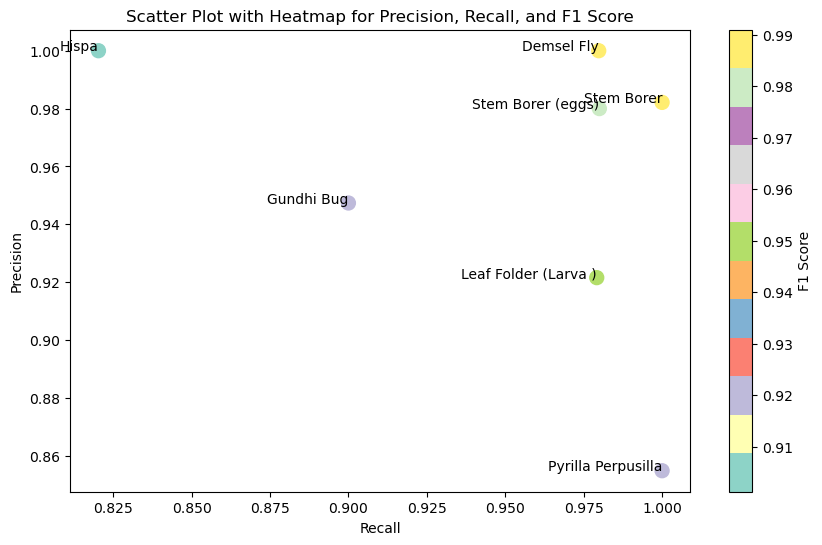

In [28]:
# Create a scatter plot with heatmaps and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)  # Adjusted the size
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.colorbar(label='F1 Score')

# Add labels for each point in the scatter plot
for i, label in enumerate(class_names):
    plt.text(recall[i], precision[i], label, fontsize=10, ha='right')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("VGG16_Rice_Pest_aug Scatter Plot with Heatmap for Precision, Recall, and F1 Score", dpi= 2000)
plt.show()



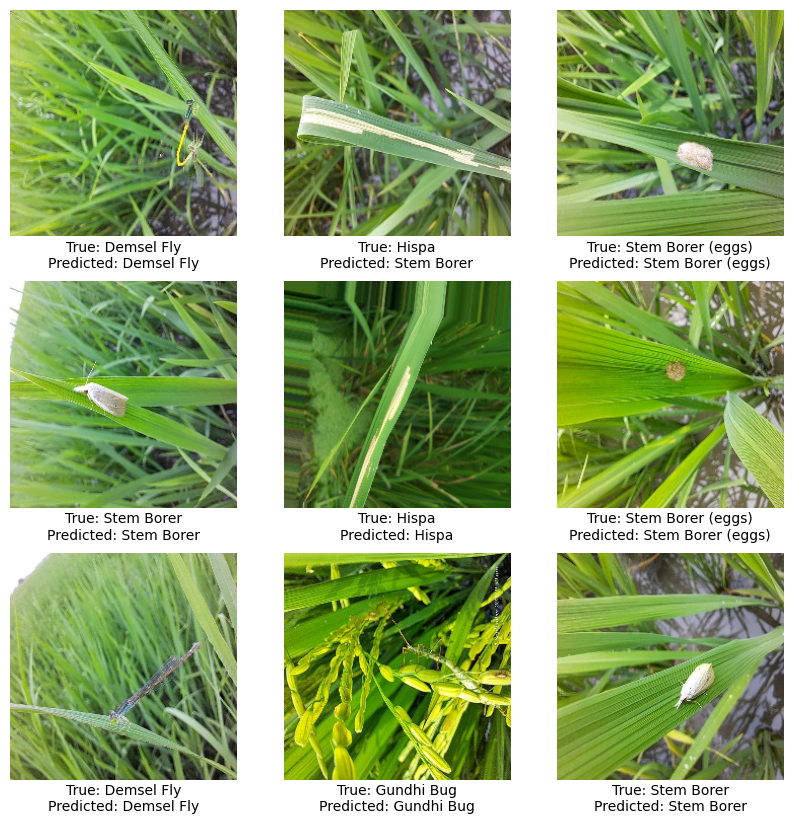

In [29]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10,fontsize=10, y=-0.2)
    plt.axis("off")

plt.savefig("VGG16_True and Predicted label of Rice_Pest_aug",bbox_inches='tight', dpi=2000)
plt.show()


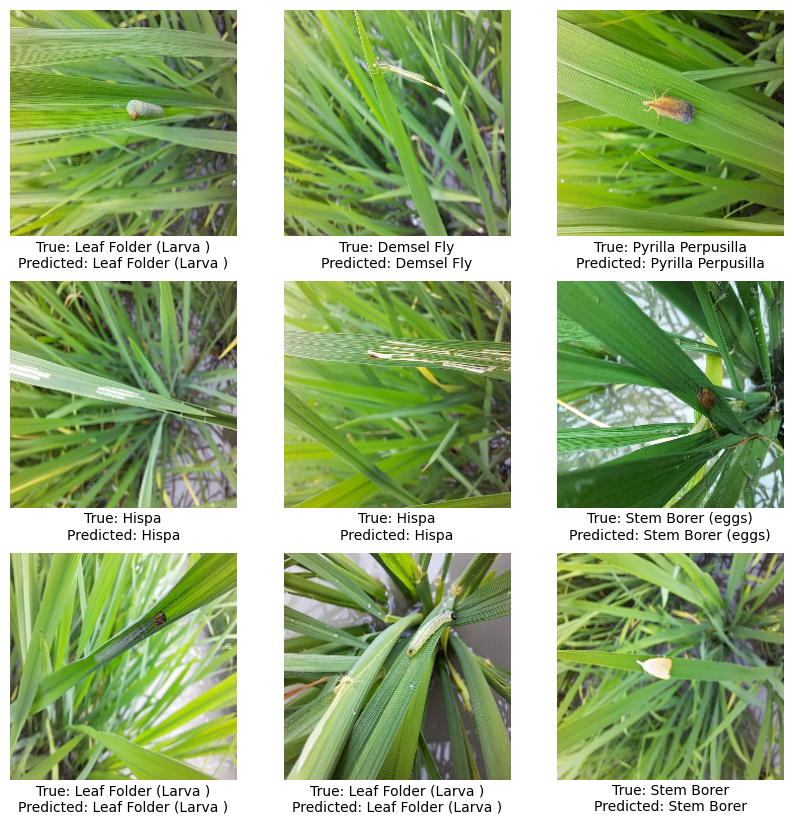

In [31]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10, fontsize=10, y=-0.2)  # Adjust y position
    plt.axis("off")

plt.savefig("VGG16_True and Predicted label of Rice_Pest2_aug", bbox_inches='tight', dpi=2000)
plt.show()

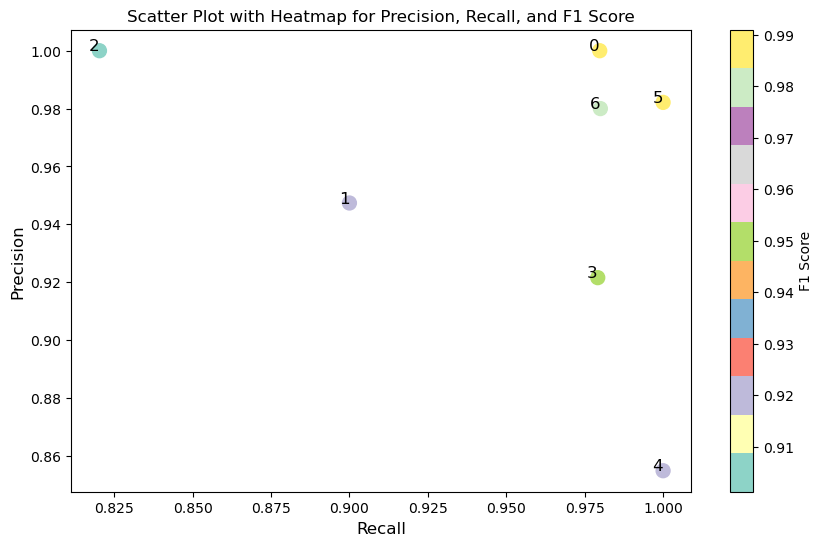

In [32]:
# Assuming recall, precision, and f1_score are already computed
# and class_names is a list of class names

# Create a mapping from class index to class name
class_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Create a scatter plot with heatmap and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.colorbar(label='F1 Score')

# Add numbered labels for each point in the scatter plot
for i in range(len(class_names)):
    plt.text(recall[i], precision[i], str(i), fontsize=12, ha='right')

# Create a legend for the mapping of numbers to class names
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{i}: {class_name}',
                      markersize=10, markerfacecolor='gray') for i, class_name in class_mapping.items()]
#plt.legend(handles=handles, title='Class Mapping', bbox_to_anchor=(1.05, 1), loc='best')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("VGG16_Rice_Pest_aug_Scatter_Plot_with_Heatmap_for_Precision_Recall_and_F1_Score1",bbox_inches='tight', dpi=2000)
plt.show()